In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('health_data.csv')
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [3]:
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]


split = 0.7 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]


X_0 = X_train[Y_train == 0]
X_1 = X_train[Y_train == 1]

#X_0 = data[data['category'] == 0].to_numpy()[:, :3]
#X_1 = data[data['category'] == 1].to_numpy()[:, :3]
#how to split data into test and train?

/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

In [4]:
def eval_classifier(f, X, Y):
    Y_ = f.predict(X)
    conf = np.zeros((2, 2))
    for y, y_ in zip(Y, Y_):
        conf[y][y_] += 1
    
    return {'conf':conf, 'acc': (conf[0,0] + conf[1,1])/np.sum(conf), 'prec': conf[1,1]/(conf[1,1] + conf[0,1]), 'rec':conf[1,1]/(conf[1,1] + conf[1,0])}

def calc_avg_metrics(metrics):
    keys = ['conf', 'acc', 'prec', 'rec']
    avg_metrics = {}
    for key in keys:
        avg_metrics[key] = sum([ m[key] for m in metrics])/len(metrics)
    return avg_metrics 

In [5]:
linear_svm = SVC(C=1.0, kernel='linear', random_state=42)
linear_svm.fit(X_train, Y_train)
#that was pretty fast

SVC(kernel='linear', random_state=42)

In [6]:
print("on training data"); 
conf = eval_classifier(linear_svm, X_train, Y_train);
print(conf)

print("on test data"); 
conf = eval_classifier(linear_svm, X_test, Y_test);
print(conf)

on training data
{'conf': array([[251.,  34.],
       [ 31., 173.]]), 'acc': 0.8670756646216768, 'prec': 0.8357487922705314, 'rec': 0.8480392156862745}
on test data
{'conf': array([[179.,  17.],
       [ 34., 126.]]), 'acc': 0.8567415730337079, 'prec': 0.8811188811188811, 'rec': 0.7875}


100%|██████████| 20/20 [07:48<00:00, 23.40s/it]


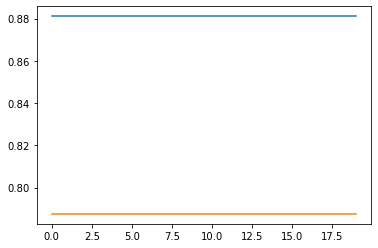

In [7]:
#great precision and recall on training data! Lets us try to experiment with values of C.
from tqdm import tqdm
PREC = []
REC = []
for c in tqdm(np.linspace(1,500, 20)):
    f = SVC(C=c, kernel='linear', random_state=42)
    f.fit(X_train, Y_train)
    results = eval_classifier(f, X_test, Y_test)
    PREC.append(results['prec'])
    REC.append(results['rec'])
plt.plot(PREC)
plt.plot(REC)

In [8]:
#not much effect of C.
#changing kernel
poly_svm = SVC(kernel='poly', degree=2, gamma=1.0, coef0=1.0, C=1.0)
poly_svm.fit(X_train, Y_train)

print("on training data"); 
conf = eval_classifier(poly_svm, X_train, Y_train);
print(conf)

print("on test data"); 
conf = eval_classifier(poly_svm, X_test, Y_test);
print(conf)

on training data
{'conf': array([[240.,  45.],
       [ 17., 187.]]), 'acc': 0.8732106339468303, 'prec': 0.8060344827586207, 'rec': 0.9166666666666666}
on test data
{'conf': array([[163.,  33.],
       [ 22., 138.]]), 'acc': 0.8455056179775281, 'prec': 0.8070175438596491, 'rec': 0.8625}


In [5]:
%reload_ext autoreload
%autoreload 1
%aimport utils.cross_validation

In [6]:
#lets do a grid search over the parameters!
#will have to implement cross-validation for this. 
#testing some code that I wrote
%aimport utils
from utils.cross_validation import cross_validation, cross_validation_serial
import time

'''
arg_dict = {'kernel':'poly', 'degree':2, 'gamma':1.0, 'coef0':1.0, 'C':1.0}
t1 = time.time()
metrics = cross_validation_serial(arg_dict=arg_dict, X=X, Y=Y)
t2 = time.time()
print('Serial Done.')
metrics = cross_validation(arg_dict=arg_dict, X=X, Y=Y)
t3 = time.time()

print('Serial in {}s. Parrallel in {}s'.format(t2-t1, t3-t2))
#Cross Validation takes 50s?!
'''

"\narg_dict = {'kernel':'poly', 'degree':2, 'gamma':1.0, 'coef0':1.0, 'C':1.0}\nt1 = time.time()\nmetrics = cross_validation_serial(arg_dict=arg_dict, X=X, Y=Y)\nt2 = time.time()\nprint('Serial Done.')\nmetrics = cross_validation(arg_dict=arg_dict, X=X, Y=Y)\nt3 = time.time()\n\nprint('Serial in {}s. Parrallel in {}s'.format(t2-t1, t3-t2))\n#Cross Validation takes 50s?!\n"

In [12]:
calc_avg_metrics(metrics)

{'conf': array([[67.4, 12.6],
        [ 9. , 51. ]]),
 'acc': 0.8457142857142859,
 'prec': 0.800281596524979,
 'rec': 0.8523083928821634}

In [8]:
%aimport utils.grid_search
from utils.grid_search import grid_search

arg_dict = {'kernel':'poly', 'degree':2, 'coef0':1.0}

#for polynomial
for degree in [2,3,4]:
    arg_dict['degree'] = degree
    a = grid_search(arg_dict = arg_dict, X=X, Y=Y, gamma_list = np.linspace(1e-6,1e-5,5), c_list = np.linspace(10,500,5), n_procs=10)
    print(f'For degree {degree}, the optimal metrics are: {calc_avg_metrics(a)}')
    print(a)

Performing grid search over gamma, c... Done. Time Elapsed = 2.094257116317749
For degree 2, the optimal metrics are: {'conf': array([[75.4,  4.6],
       [15.4, 44.6]]), 'acc': 0.8571428571428571, 'prec': 0.9052941213836299, 'rec': 0.742520199897249}
[{'conf': array([[81.,  7.],
       [15., 37.]]), 'acc': 0.8428571428571429, 'prec': 0.8409090909090909, 'rec': 0.7115384615384616, 'kernel': 'poly', 'degree': 2, 'coef0': 1.0, 'gamma': 1e-06, 'C': 10.0}, {'conf': array([[85.,  1.],
       [13., 41.]]), 'acc': 0.9, 'prec': 0.9761904761904762, 'rec': 0.7592592592592593, 'kernel': 'poly', 'degree': 2, 'coef0': 1.0, 'gamma': 1e-06, 'C': 10.0}, {'conf': array([[72.,  7.],
       [21., 40.]]), 'acc': 0.8, 'prec': 0.851063829787234, 'rec': 0.6557377049180327, 'kernel': 'poly', 'degree': 2, 'coef0': 1.0, 'gamma': 1e-06, 'C': 10.0}, {'conf': array([[64.,  4.],
       [18., 54.]]), 'acc': 0.8428571428571429, 'prec': 0.9310344827586207, 'rec': 0.75, 'kernel': 'poly', 'degree': 2, 'coef0': 1.0, 'gam

In [13]:
#for linear
arg_dict = {'kernel':'linear'}
a = grid_search(arg_dict = arg_dict, X=X, Y=Y, gamma_list = [1], c_list = np.linspace(1,20,25), n_procs=15)
print(f'For linear, the optimal metrics are: {calc_avg_metrics(a)}')

Performing grid search over gamma, c... Done. Time Elapsed = 17.928589344024658
For linear, the optimal metrics are: {'conf': array([[69.8, 10.2],
       [10.2, 49.8]]), 'acc': 0.8542857142857143, 'prec': 0.8291029651506315, 'rec': 0.8302905048806688}


In [26]:
#gaussian
arg_dict = {'kernel':'rbf', 'coef0':1.0}
a = grid_search(arg_dict = arg_dict, X=X, Y=Y, gamma_list = np.linspace(1e-6, 1e-3, 100), c_list = np.linspace(1,200,100), n_procs=10)
print(f'For Gaussian Kernel, the optimal metrics are: {calc_avg_metrics(a)}')

Performing grid search over gamma, c... Done. Time Elapsed = 105.32173562049866
For Gaussian Kernel, the optimal metrics are: {'conf': array([[73.4,  6.6],
       [13. , 47. ]]), 'acc': 0.86, 'prec': 0.8764805856876302, 'rec': 0.7834816215963757}


In [27]:
print(a)

[{'conf': array([[80.,  8.],
       [11., 41.]]), 'acc': 0.8642857142857143, 'prec': 0.8367346938775511, 'rec': 0.7884615384615384, 'kernel': 'rbf', 'coef0': 1.0, 'gamma': 1e-06, 'C': 39.19191919191919}, {'conf': array([[82.,  4.],
       [11., 43.]]), 'acc': 0.8928571428571429, 'prec': 0.9148936170212766, 'rec': 0.7962962962962963, 'kernel': 'rbf', 'coef0': 1.0, 'gamma': 1e-06, 'C': 39.19191919191919}, {'conf': array([[71.,  8.],
       [18., 43.]]), 'acc': 0.8142857142857143, 'prec': 0.8431372549019608, 'rec': 0.7049180327868853, 'kernel': 'rbf', 'coef0': 1.0, 'gamma': 1e-06, 'C': 39.19191919191919}, {'conf': array([[60.,  8.],
       [15., 57.]]), 'acc': 0.8357142857142857, 'prec': 0.8769230769230769, 'rec': 0.7916666666666666, 'kernel': 'rbf', 'coef0': 1.0, 'gamma': 1e-06, 'C': 39.19191919191919}, {'conf': array([[74.,  5.],
       [10., 51.]]), 'acc': 0.8928571428571429, 'prec': 0.9107142857142857, 'rec': 0.8360655737704918, 'kernel': 'rbf', 'coef0': 1.0, 'gamma': 1e-06, 'C': 39.1

In [ ]:
svm_gausian = SVC(kernel='rbf', gamma=1e-8, C = 1000)
svm_gausian.fit(X_train, Y_train)

print("on training data"); 
conf = eval_classifier(svm_gausian, X_train, Y_train);
print(conf)

print("on test data"); 
conf = eval_classifier(svm_gausian, X_test, Y_test);
print(conf)

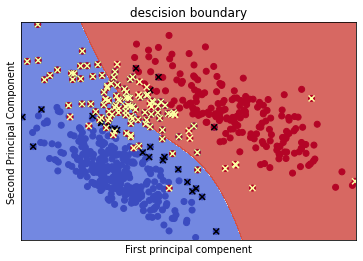

In [32]:
#code to plot the descision boundary.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, svd_solver = 'randomized', random_state = 1)
X_ = pca.fit_transform(X);

#best solver was rbf
svc = SVC(kernel='rbf')
svc.fit(X_, Y)
h=0.2
#code to plot the boundary
# create a mesh to plot in
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['descision boundary']

X_support = X_[svc.support_]
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_[:, 0], X_[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.scatter(X_support[:, 0], X_support[:, 1], c=Y[svc.support_], cmap=plt.cm.inferno, marker='x')
plt.xlabel('First principal compenent')
plt.ylabel('Second Principal Component')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[0])

plt.show()

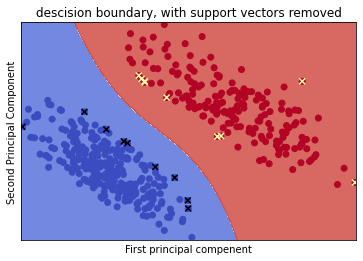

In [33]:
#removing support vectors from the dataset!
support_vectors = svc.support_
n_vectors = X_.shape[0]

X_new = X_[[i for i in range(n_vectors) if i not in support_vectors]]
Y_new = Y[[i for i in range(n_vectors) if i not in support_vectors]]

svc = SVC(kernel='rbf').fit(X_new, Y_new)
x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['descision boundary, with support vectors removed']

X_support = X_new[svc.support_]
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, cmap=plt.cm.coolwarm)
plt.scatter(X_support[:, 0], X_support[:, 1], c=Y_new[svc.support_], cmap=plt.cm.inferno, marker='x')
plt.xlabel('First principal compenent')
plt.ylabel('Second Principal Component')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[0])

plt.show()

In [ ]:
#Now all i need to do is implement SMO!